In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

In [2]:
# 다른 Titanic 데이터셋 URL 예시
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Set PassengerId as the index
titanic.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# **plt.pie()**

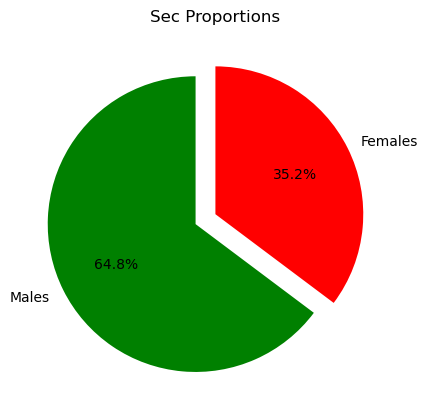

In [8]:
# Create a pie chart presenting the male/female proportion
males = (titanic['Sex'] == 'male').sum()
females = (titanic['Sex'] == 'female').sum()

proportions = [males, females]

plt.pie(proportions, 
        explode = (0.15, 0), 
        labels = ['Males', 'Females'], 
        shadow = False, colors = ['green', 'red'], 
        startangle = 90, 
        autopct = "%1.1f%%")

plt.title('Sec Proportions')

plt.show()

In [11]:
titanic['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

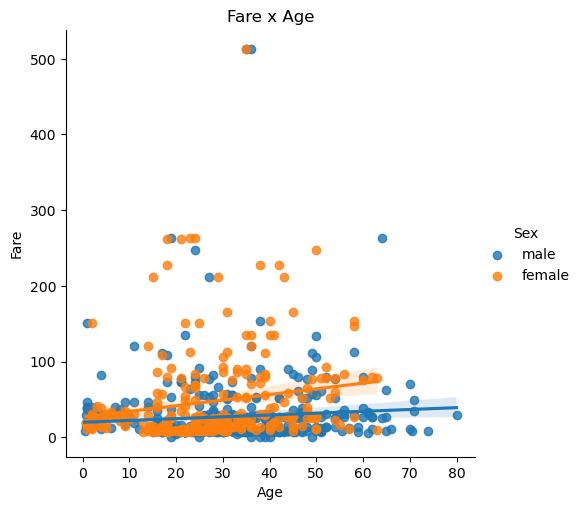

In [13]:
# Create a scatterplot with the Fare payed and the Age, differ the plot color by gender
# Linear model plot => lmplot

lm = sns.lmplot(x = 'Age', y = 'Fare', data = titanic, hue = 'Sex')

lm.set(title = 'Fare x Age')

## **직접 참조 vs 열 이름만 넣는 방식**

### **직접 참조**
- x와 y값에 DataFrame의 컬럼을 직접 참조하는 방식으로 주로, **matplotlib나 plt.scatter**에서 사용된다.

### **열 이름만 넣을 수 있는 경우**
- **seaborn**이 내부적으로 컬럼 이름을 자동으로 처리

In [18]:
# How many people survived?
titanic.loc[titanic['Survived'] == 1].count()

# titanic['Survived'].sum()

PassengerId    342
Survived       342
Pclass         342
Name           342
Sex            342
Age            290
SibSp          342
Parch          342
Ticket         342
Fare           342
Cabin          136
Embarked       340
dtype: int64

Text(0.5, 1.0, 'Fare Payed Histrogram')

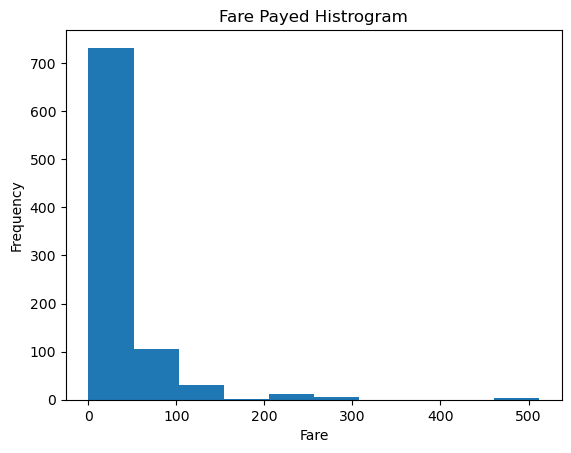

In [19]:
# Create a histogram with the Fare Payed
df = titanic['Fare'].sort_values(ascending=False)

# create the plot
plt.hist(df) # bins: 데이터를 나눌 구간 정의

# Set the title and labels
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Payed Histrogram')